<a href="https://colab.research.google.com/github/tbrandonstevenson/Data-Exercises/blob/main/RevenueClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, to activate my GPU, I will go to Edit->Notebook Settings and select GPU in hardware acceleration. This will make training the neural network quicker for later in the page.

I also manually upload the coding_round_data.csv file.

In [1]:
#load csv data offline (on the left menu, under Files, click up arrow and select the csv file)
import pandas as pd
raw_data=pd.read_csv('coding_round_data.csv')

#view general properties of data
display(raw_data.info())

display(raw_data.describe(include='all'))

display(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
raw_data.isnull().values.any()

False

On the surface it appears that there isn't any missing data, as all columns show the same count of 12330. It is still possible that the populated data could be incorrect or nonsensical though. I will create some simple plots to check for this. First let me inspect the unique values for each column to get a sense of whether they are categorical or numerical.

In [3]:
#view unique values for each column
for key in raw_data:
  print(key)
  print(len(raw_data[key].unique()))
  if(len(raw_data[key].unique()) < 30):
    print(sorted(raw_data[key].unique()))
  print()
raw_data.dtypes


Administrative
27
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27]

Administrative_Duration
3335

Informational
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 24]

Informational_Duration
1258

ProductRelated
311

ProductRelated_Duration
9551

BounceRates
1872

ExitRates
4777

PageValues
2704

SpecialDay
6
[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

Month
10
['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

OperatingSystems
8
[1, 2, 3, 4, 5, 6, 7, 8]

Browser
13
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Region
9
[1, 2, 3, 4, 5, 6, 7, 8, 9]

TrafficType
20
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

VisitorType
3
['New_Visitor', 'Other', 'Returning_Visitor']

Weekend
2
[False, True]

Revenue
2
[False, True]



Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
#Change dtype of month from object to int
monthdict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
raw_data['Month']=raw_data['Month'].map(monthdict)

#Change dtype of Weekend from bool to int
raw_data['Weekend']=raw_data['Weekend'].astype(int)

To get a better idea of how these variables affect the result, I will plot the unconditional mean result for each categorical value and see if there is any structure. I have identified variables that I believe are categorical based on the unique counts above. For the numerical data, I will perform some reasonable log-spaced binning to observe structure. I include error bars which are determined by assuming a binomial distribution for the Revenue value in each bin/value of the plotted variable.

Administrative


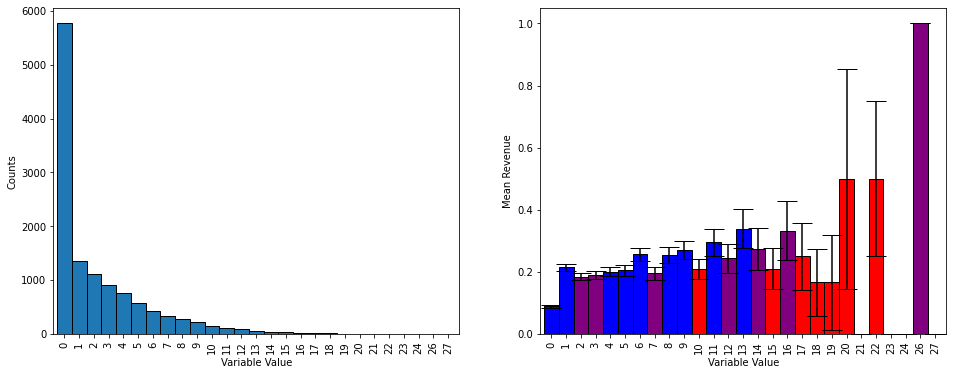

Administrative_Duration


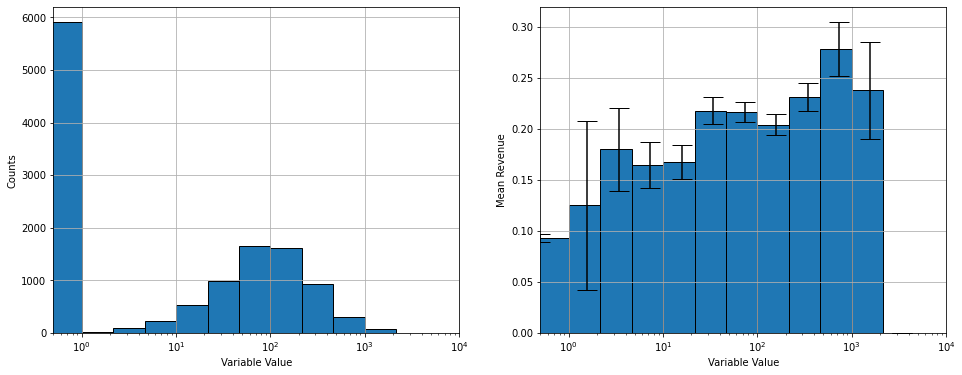

Informational


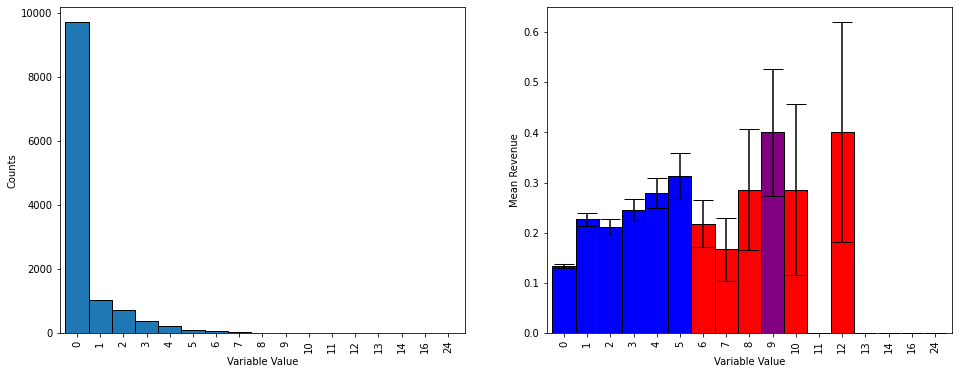

Informational_Duration


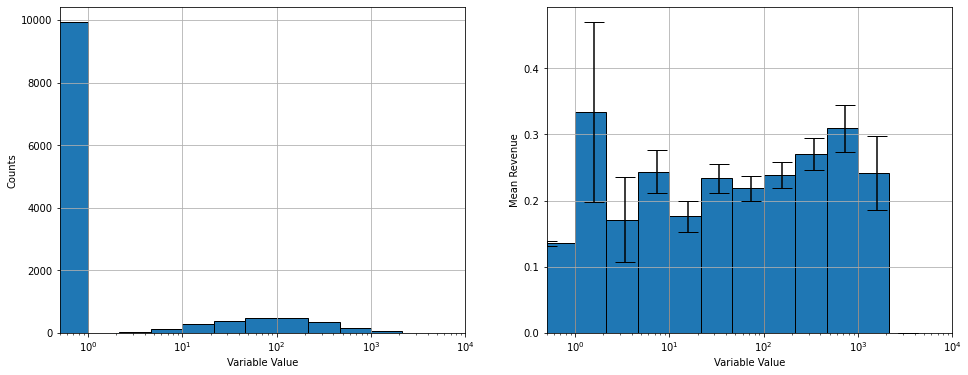

ProductRelated


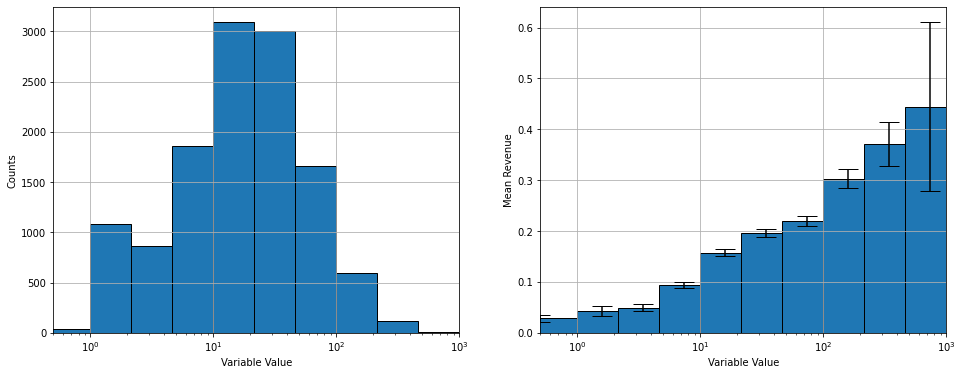

ProductRelated_Duration


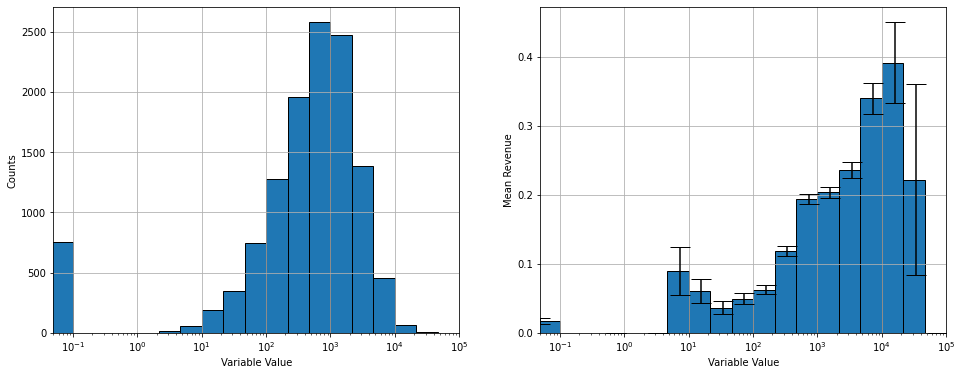

BounceRates


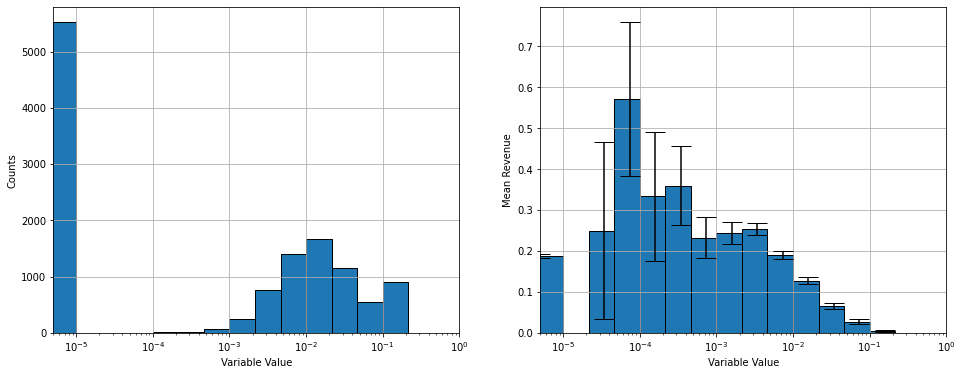

ExitRates


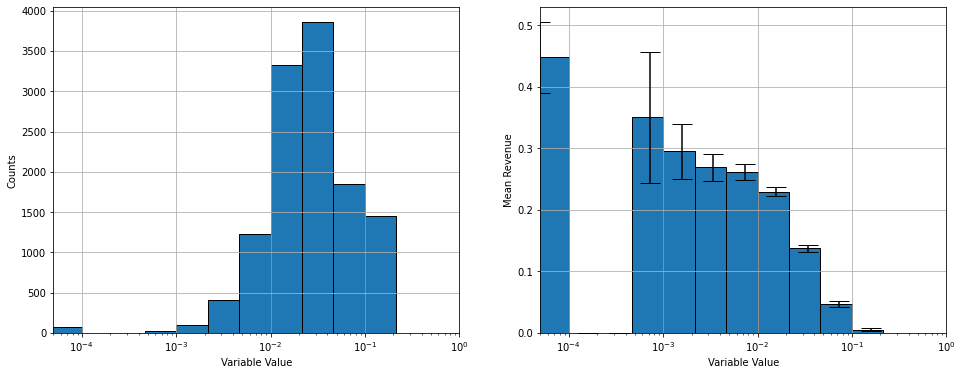

PageValues


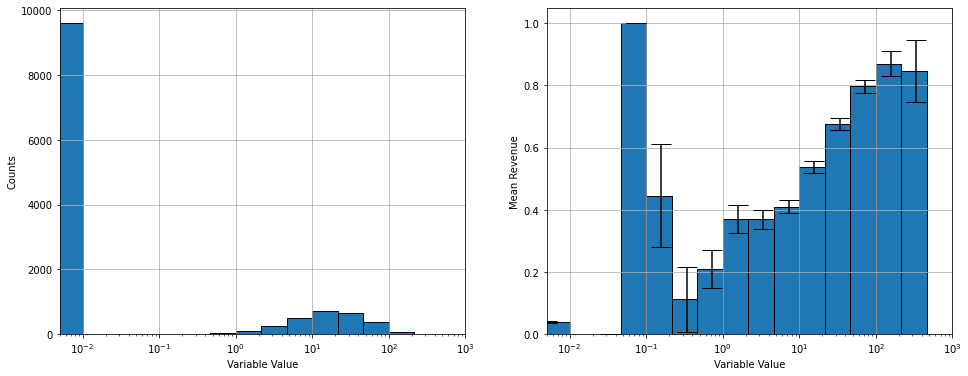

SpecialDay


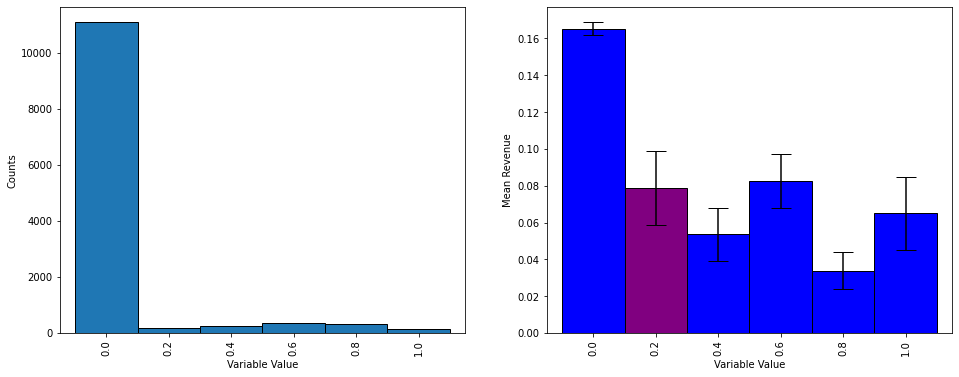

Month


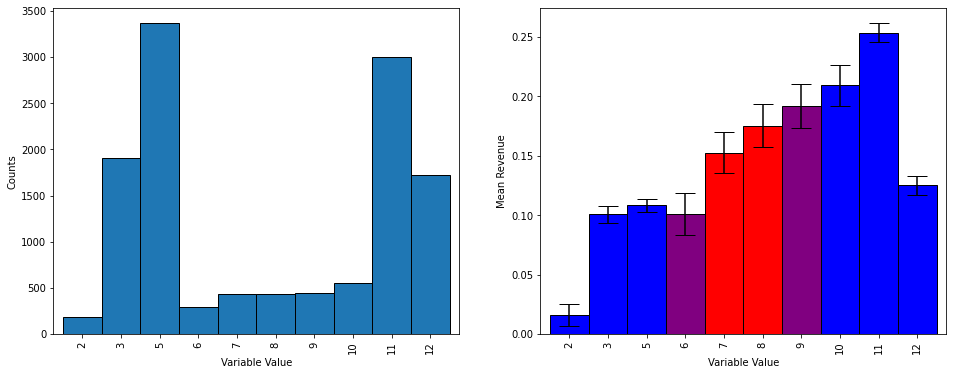

OperatingSystems


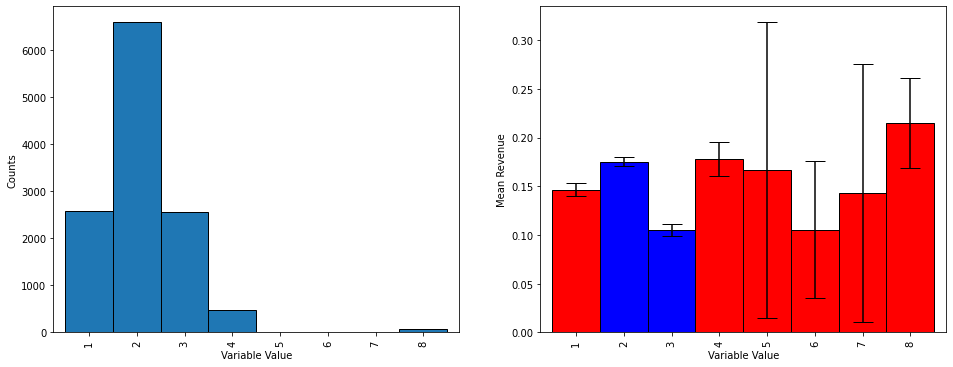

Browser


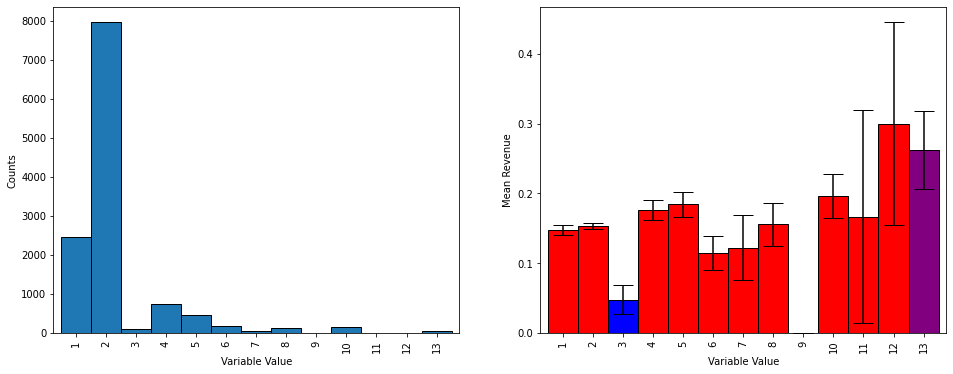

Region


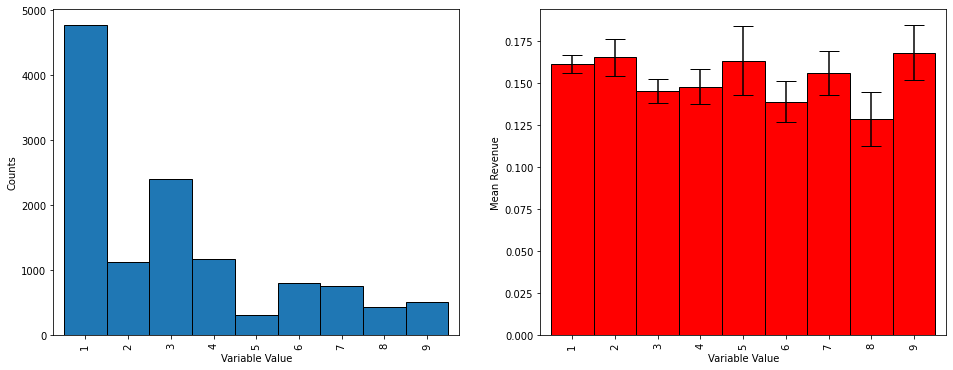

TrafficType


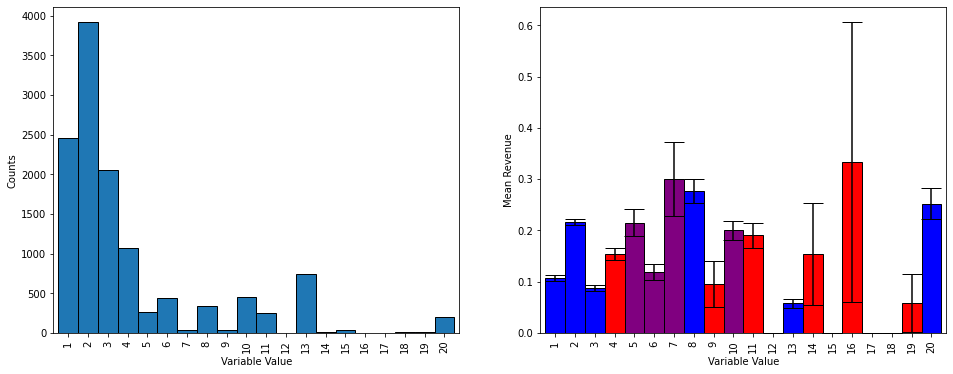

VisitorType


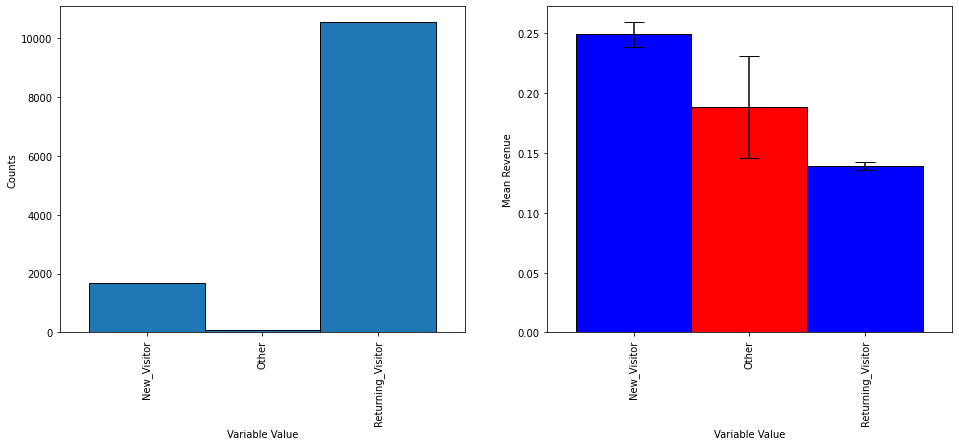

Weekend


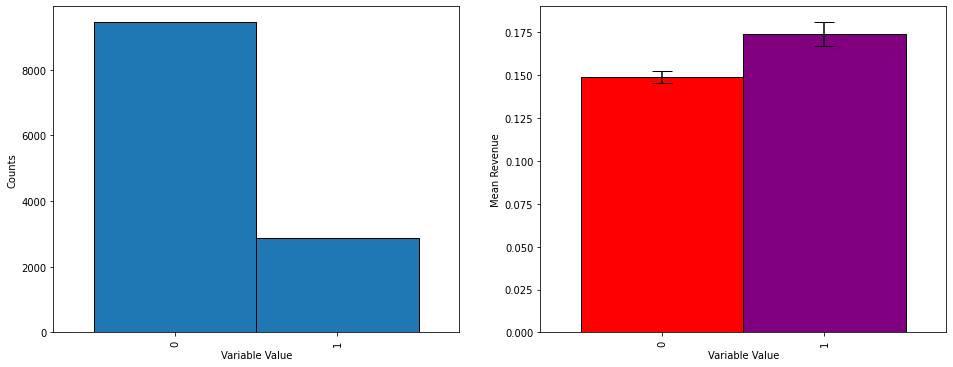

Revenue


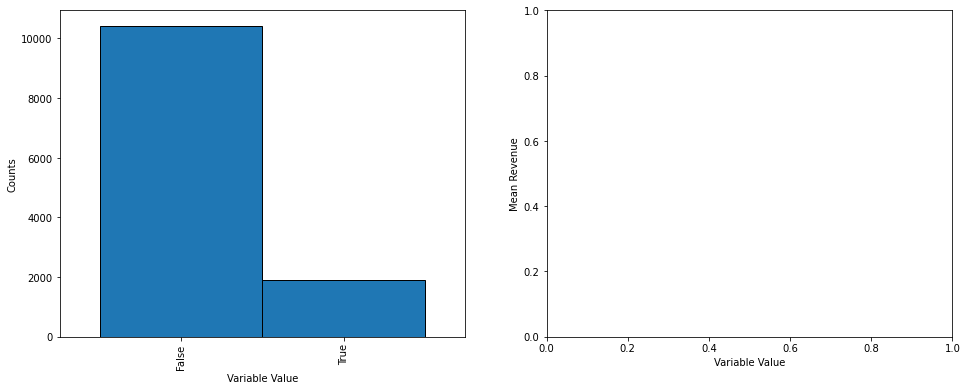

In [5]:
import sklearn.feature_selection
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import numpy as np
#plot features
for key in raw_data:
  print(key)
  fig, ax = plt.subplots(ncols=2,figsize=(16,6))
  #manually identify features which are numerical
  if 'Duration' in key or 'Rates' in key or 'Values' in key or 'Related' in key:
    #create log binning
    uniquevalues=sorted(raw_data[key].unique())
    minvalue=uniquevalues[0]
    if minvalue==0:
      minvalue=uniquevalues[1]
    maxvalue=uniquevalues[-1]
    startdecade=np.floor(np.log10(minvalue))
    enddecade=np.ceil(np.log10(maxvalue))
    binsperdecade=3
    nbins=1+binsperdecade*int(enddecade-startdecade)
    bins=np.logspace(startdecade,enddecade,nbins)
    bins=np.insert(bins, 0, 0)
    nbins=nbins+1
    
    countdata=raw_data.groupby(pd.cut(raw_data[key], bins=bins, include_lowest=True))['Revenue'].agg(['mean', 'count'])
    stddev=np.sqrt((countdata['mean']*(1-countdata['mean']))/countdata['count'])

    ax[0].set_xscale("log")
    raw_data[key].hist(ax=ax[0], bins=bins, ec="k")

    ax[1].set_xscale("log")
    ax[1].bar(bins[:-1], raw_data.groupby(pd.cut(raw_data[key], bins=bins, include_lowest=True))['Revenue'].mean().values, width=np.diff(bins), yerr=stddev, capsize=10, ec="k", align="edge")
    ax[1].grid()
   
    ax[0].set_xlim((bins[1]/2,bins[-1]))
    ax[1].set_xlim((bins[1]/2,bins[-1]))

  #else categorical features
  else:
    raw_data[key].value_counts().sort_index().plot(ax=ax[0],kind='bar', width=1, ec="k")
    if key != 'Revenue':
      countdata=raw_data.groupby(key)['Revenue'].agg(['mean','count'])
      #compute binomical std dev
      stddev=np.sqrt((countdata['mean']*(1-countdata['mean']))/countdata['count'])

      #convert categ. vars to one hot enc and do chisq test to identify whether that category has significant unconditional dependence on revenue result
      enc=OneHotEncoder()
      Xdata = enc.fit_transform(raw_data[[key]])
      Ydata = raw_data[['Revenue']]
      stat_res=sklearn.feature_selection.chi2(Xdata, Ydata)
      mask1=stat_res[1][:]<0.003
      mask2=stat_res[1][:]<0.05
      colorstr=[]
      for sig1,sig2 in zip(mask1,mask2):
        if sig1:
          colorstr.append('blue')
        elif sig2:
          colorstr.append('purple')
        else:
          colorstr.append('red')

      raw_data.groupby(key)['Revenue'].mean().plot(ax=ax[1], kind='bar', width=1, ec="k", yerr=stddev, capsize=10, color=colorstr)

  ax[0].set_xlabel("Variable Value")
  ax[1].set_xlabel("Variable Value")
  ax[0].set_ylabel("Counts")
  ax[1].set_ylabel("Mean Revenue")
  
  plt.show()


These plots reveal clear structure to the predicted Revenue for many of the variables. Strangely, rows with months January and April don't exist in the data. I could treat the months as different dimensions of categorical data, where each one is unique, or I could encode them in another way. I opt for the latter approach since there is no data to train with in Jan and Apr, and I want to create a model that can predict incoming data with these months. Ordinal encoding makes some sense, but doesn't appropriately handle the cyclical property of months (e.g. Jan and Dec should have a distance of 1, not 11). Therefore, I will convert this variable into two which have the properties we want.

I implement the following transformation on the variable month $m_i$:

$$x(m_i)=\cos \left(\frac{2 \pi m_i}{12}\right)$$
$$y(m_i)=\sin \left(\frac{2 \pi m_i}{12}\right)$$

This transformation ensures that the distance between month values is accurately represented.


In [6]:
import math

def transform_cyclical(m):
  x=math.cos((2.*math.pi*m)/12.)
  y=math.sin((2.*math.pi*m)/12.)
  return x,y

raw_data.describe()
raw_data['Month_x'],raw_data['Month_y']=zip(*raw_data['Month'].map(transform_cyclical))
raw_data.drop(columns=['Month'],inplace=True)

raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_x,Month_y
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,0,False,0.5,0.866025
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,0,False,0.5,0.866025
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,0,False,0.5,0.866025
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,0,False,0.5,0.866025
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,1,False,0.5,0.866025


This is a supervised learning problem with both numerical and categorical features. If I employ a one-hot encoding scheme for the categorical variables, then I end up with a feature space with ~100 dimensions. I assume that a sample of ~10k is enough to retain ~100 features, and so I proceed without any feature selection. If there was less data, then I would use the chisq results above to remove some categorical features, especially the features with low sample counts, however this would potentially leave me vulnerable to identifying conditional dependence in these features. I could investigate this conditional dependence by creating the coming models with and without a feature and evaluate the performance.

In [7]:
#convert categorical to one-hot encoding
for key in ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']:
  y = pd.get_dummies(raw_data[key], prefix=key)
  raw_data=pd.concat([raw_data, y], axis=1)
  raw_data.drop(columns=[key],inplace=True)

In [8]:
#define indep and dep vars
Xdata = raw_data.drop('Revenue',axis=1)
Ydata = raw_data['Revenue']

#split data to train 
from sklearn.model_selection import train_test_split

X_train_val, X_test, Y_train_val, Y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=42)
print(X_train_val.shape, Y_train_val.shape)
print(X_test.shape, Y_test.shape)

(9864, 66) (9864,)
(2466, 66) (2466,)


There are 66 features remaining. I make a split of 60/20/20 into Train/Val/Test datasets with K-fold cross validation (K=4). I should probably use stratified sampling to ensure that the features with low counts exist in decent numbers for all training partitions. I ignore this for now. 

I will implement a logistic regression model and evaluate its performance. I iterate through various hyperparameters of the logreg model to identify the set of hyperparameters which produce the largest accuracy. We could also maximize on different evaluation metrics, for example  precision, recall, or the f1 score combination of these two.

In [9]:
import itertools #to create combinations of hyperparameters for CV

#working with training data, lets use 4-fold cross validation to train/validate model parameters and determine best hyperparameters.
from sklearn.model_selection import KFold 
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

#ready accuracy library
from sklearn.metrics import accuracy_score
acc_score = []

from sklearn.linear_model import LogisticRegression
#Logistic Regression
#Hyperparameters aren't critical here. Lets define some anyway and use CV to identify optimal hyperparameters for log reg.

#solved hyperparameters are: ['l2' 'lbfgs' '0.01']
penalty=['none', 'l1', 'l2']
solvers=['newton-cg', 'lbfgs', 'saga']
c_values=[100, 10, 1.0, 0.1, 0.01]
hp_combos=list(itertools.product(penalty, solvers, c_values))
cv_acc=[]

from warnings import filterwarnings
filterwarnings('ignore')

for pen,sol,cv in hp_combos:
  sub_acc=[]
  if pen=='none':
    model = LogisticRegression(penalty=pen, solver=sol, random_state=42)
  elif (sol=='newton-cg' or sol=='lbfgs') and pen=='l1':
    cv_acc.append([0]*k)
    continue
  else:
    model = LogisticRegression(penalty=pen, solver=sol, C=cv, random_state=42)
  for train_index, val_index in kf.split(X_train_val):#returns list of indices
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    Y_train, Y_val = Y_train_val.iloc[train_index], Y_train_val.iloc[val_index]
    model.fit(X_train, Y_train)
    predictions=model.predict(X_val)
    acc=accuracy_score(Y_val, predictions)
    sub_acc.append(acc)#np.mean(sub_acc)
  cv_acc.append(sub_acc)

#mutually sort the model params by accuracy performance
idx   = np.argsort(np.mean(cv_acc,axis=1))[::-1]
for x,y in zip(np.array(hp_combos)[idx],np.array(cv_acc)[idx]):
  print(x,y)

['l2' 'lbfgs' '0.01'] [0.88523925 0.8892944  0.88605028 0.88605028]
['l2' 'lbfgs' '0.1'] [0.88199513 0.89051095 0.88686131 0.88564477]
['none' 'lbfgs' '10'] [0.88402271 0.89010543 0.88483374 0.88523925]
['none' 'lbfgs' '1.0'] [0.88402271 0.89010543 0.88483374 0.88523925]
['none' 'lbfgs' '100'] [0.88402271 0.89010543 0.88483374 0.88523925]
['none' 'lbfgs' '0.1'] [0.88402271 0.89010543 0.88483374 0.88523925]
['none' 'lbfgs' '0.01'] [0.88402271 0.89010543 0.88483374 0.88523925]
['l2' 'lbfgs' '10'] [0.88321168 0.89010543 0.88564477 0.88523925]
['l2' 'lbfgs' '1.0'] [0.88321168 0.88969992 0.88564477 0.88523925]
['l2' 'lbfgs' '100'] [0.88280616 0.89010543 0.88564477 0.88483374]
['l2' 'newton-cg' '100'] [0.88037307 0.88605028 0.88564477 0.88767234]
['l2' 'newton-cg' '10'] [0.88077859 0.8864558  0.88442822 0.88767234]
['none' 'newton-cg' '0.1'] [0.88037307 0.88605028 0.88564477 0.88686131]
['none' 'newton-cg' '1.0'] [0.88037307 0.88605028 0.88564477 0.88686131]
['none' 'newton-cg' '0.01'] [0.88

Now that we've obtained the hyperparameters which achieve the best f1 score on our cross validated set of data, let's evaluate the model's performance on the reserved test data.

In [10]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#['l2' 'lbfgs' '0.01']
logreg=LogisticRegression(penalty='l2', solver='lbfgs', C=0.01, random_state=42)#this is our winner from cross validation
logreg.fit(X_train_val, Y_train_val)
predictions=logreg.predict(X_test)

print("accuracy: ",accuracy_score(Y_test, predictions))
print("precision: ",precision_score(Y_test, predictions))
print("recall: ",recall_score(Y_test, predictions))

accuracy:  0.8722627737226277
precision:  0.7448979591836735
recall:  0.35523114355231145


Accuracy is the number of my guesses which were correct.

Precision is the number of people who bought that I think bought, divided by the total number of people that I think bought.

Recall is number of people who bought that I think bought, divided by total number of people who bought.

Since there are around five times as many datapoints which didn't make a purchase vs those that did, guessing '0' for every input would give an accuracy of 84.5%. This should be seen as the baseline level to compare our accuracy with. Our value of 87% isn't that much better.

The precision of 75% is pretty good - 3 out of every 4 predicted buyers were actually buyers.

The 35% recall isn't great - only 1 in 3 actual buyers were identified.

Now I will implement a neural network in Pytorch to see if implementing a nonlinear dependence can improve the result. Since there are 66 input values and only ~10k datapoints, the network cannot be too complex. I stick with a single hidden layer with 10 connections, for a total number of parameters to optimize of ~700. I use a rectified linear unit activation function, and define the loss via the binary cross entropy function. 

In [11]:
import torch
import torch.nn as nn
#import torch.nn.functional as F

n_hidden=10

class MyNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(in_features=66, out_features=n_hidden)
    self.a1 = nn.ReLU()
    self.l2 = nn.Linear(in_features=n_hidden, out_features=1)
    self.output = nn.Sigmoid()
 
  def forward(self, x):
    x = self.l1(x)
    x = self.a1(x)
    x = self.l2(x)
    x = self.output(x)
    return x

model=MyNetwork()
lossmodule = nn.BCELoss()
loss_history=[]

for name, param in model.named_parameters():
    print("Parameter %s, shape %s" % (name, str(param.shape)))

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Parameter l1.weight, shape torch.Size([10, 66])
Parameter l1.bias, shape torch.Size([10])
Parameter l2.weight, shape torch.Size([1, 10])
Parameter l2.bias, shape torch.Size([1])
Device cuda


I normalize the input data for each feature to be between 0 and 1 for better training sensitivity. Then I will load the data into the PyTorch dataloader structure. I select a batch size of 1024, with the training data randomized each batch.

In [12]:
#normalize input data for each dimension between 0 and 1.
norm_X_train = (((X_train_val-Xdata.min())) / (Xdata.max()-Xdata.min()))
norm_X_test = (((X_test-Xdata.min())) / (Xdata.max()-Xdata.min()))
#norm_X_train = ((2*(X_train_val-Xdata.min())) / (Xdata.max()-Xdata.min())) - 1
#norm_X_test = ((2*(X_test-Xdata.min())) / (Xdata.max()-Xdata.min())) - 1

X_train_dataset = torch.tensor(norm_X_train.values.astype(np.float32))
Y_train_dataset = torch.tensor(Y_train_val.values.astype(np.float32))
X_test_dataset = torch.tensor(norm_X_test.values.astype(np.float32))
Y_test_dataset = torch.tensor(Y_test.values.astype(np.float32))

import torch.utils.data as data_utils
batch_size=1024
train_tensor = data_utils.TensorDataset(X_train_dataset, Y_train_dataset) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True, drop_last=True)
test_tensor = data_utils.TensorDataset(X_test_dataset, Y_test_dataset) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = False, drop_last=False)

I decide to use the Adam optimizing method with a learning rate of 1E-3, and train for 500 epochs. Improved results may be obtained by performing cross validation to identify the optimal hyperparameters, like what was done before with Logistic Regression. 

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs=2000
model.to(device)
model.train()

from tqdm.notebook import tqdm
#tqdm for nice output progress bar
for epoch in tqdm(range(n_epochs)):
    for data_inputs, data_labels in train_loader:

        #Move input data to device (only strictly necessary if we use GPU)
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

        #Run the model on the input data
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

        #Calculate the loss
        loss = lossmodule(preds, data_labels.float())
        loss_history.append(loss)
        
        #Perform backpropagation
        #Zero gradients
        optimizer.zero_grad()
        #Perform backpropagation
        loss.backward()

        #Update the parameters
        optimizer.step()
    
    #Report loss periodically
    if epoch%100 == 0:
        print("Loss: "+ str(loss.item()))

Loss: 0.5931016802787781
Loss: 0.326368510723114
Loss: 0.29180824756622314
Loss: 0.24155409634113312
Loss: 0.2445252537727356
Loss: 0.22812844812870026
Loss: 0.23556356132030487
Loss: 0.2397426962852478
Loss: 0.25709107518196106
Loss: 0.19130197167396545
Loss: 0.21332241594791412
Loss: 0.22060438990592957
Loss: 0.2094106674194336
Loss: 0.25291377305984497
Loss: 0.21024587750434875
Loss: 0.23248007893562317
Loss: 0.20309367775917053
Loss: 0.18305447697639465
Loss: 0.19374600052833557
Loss: 0.19654473662376404



Let's plot the loss function to see if we've saturated our model's training capabilities. I also plot a moving average.

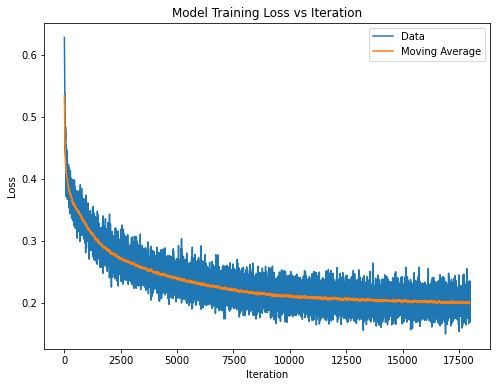

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(loss_history, label='Data')
window=50
ax.plot((np.convolve(loss_history, np.ones(window), 'valid') / window), label='Moving Average')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Model Training Loss vs Iteration")
plt.legend()
plt.show()

It appears the loss has saturated, which means we have trained long enough. Now I evaluate the model on the test dataset and obtain the evaluation metrics which we used for the Logistic Regression model.

In [15]:
#change to evaluation mode so that we don't calculate gradients for training
model.eval()

#initialize confusion matrix
cm=np.zeros(shape=(2,2))

with torch.no_grad(): # Deactivate gradients for the following code
    for data_inputs, data_labels in test_loader:

        #determine prediction of model on test data
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)
        #convert prediction to 0/1
        pred_labels = (preds >= 0.5).long()

        #populate confusion matrix
        zerotensor = torch.zeros_like(data_labels) 
        onetensor = torch.ones_like(data_labels)
        cm[0,0] += torch.dot((pred_labels == data_labels).float(), (data_labels == onetensor).float())
        cm[0,1] += torch.dot((pred_labels != data_labels).float(), (data_labels == zerotensor).float())
        cm[1,0] += torch.dot((pred_labels != data_labels).float(), (data_labels == onetensor).float())
        cm[1,1] += torch.dot((pred_labels == data_labels).float(), (data_labels == zerotensor).float())

acc=(cm[0,0]+cm[1,1])/cm.sum()
prec=(cm[0,0])/(cm[0,0]+cm[0,1])
rec=(cm[0,0])/(cm[0,0]+cm[1,0])
print("Accuracy: " + str(acc))
print("Precision: " + str(prec))
print("Recall: " + str(rec))

Accuracy: 0.8876723438767234
Precision: 0.7080745341614907
Recall: 0.5547445255474452


The accuracy is marginally better (89% vs 87%)

The precision is slightly worse (71% vs 74%)

The recall is much better (55% vs 35%)

Overall the neural network improved the model a little bit from a simple logistic regression. This improvement was obtained without hyperparameter tuning, or network architecture investigation. The network that was created was also quite shallow, limiting its predictive capabilities. There may not be enough data to warrant a neural network solution, and I would next investigate creating a model using SVM for this particular problem.